In [41]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats

%matplotlib inline
pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_rows = 999

df = pd.read_excel('../SystemManager.xls')

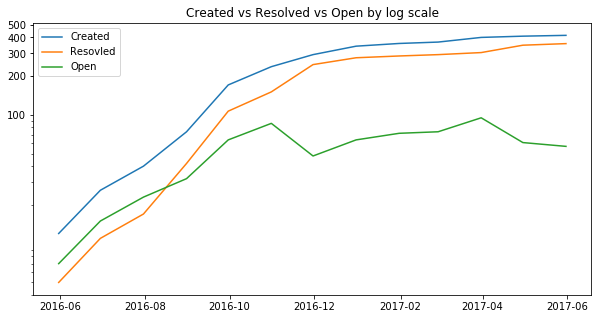

In [88]:
created_size = df.groupby(pd.Grouper(key='Created', freq='M')).size()
resolved_size = df.groupby(pd.Grouper(key='Resolved', freq='M')).size()

created_cumsum = created_size.cumsum()
resolved_cumsum = resolved_size.cumsum()
opened_cumsum = created_cumsum - resolved_cumsum

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)
ax.set_title('Created vs Resolved vs Open by log scale')

ax.plot(created_cumsum.index, created_cumsum, resolved_cumsum.index, resolved_cumsum, opened_cumsum.index, opened_cumsum)
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(mtick.ScalarFormatter())
ax.set_yticks(range(100, max(created_cumsum[-1], resolved_cumsum[-1]) + 100, 100))
ax.legend(['Created', 'Resovled', 'Open'])
plt.show()